### Umap extraction


/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/umap/umap_.p

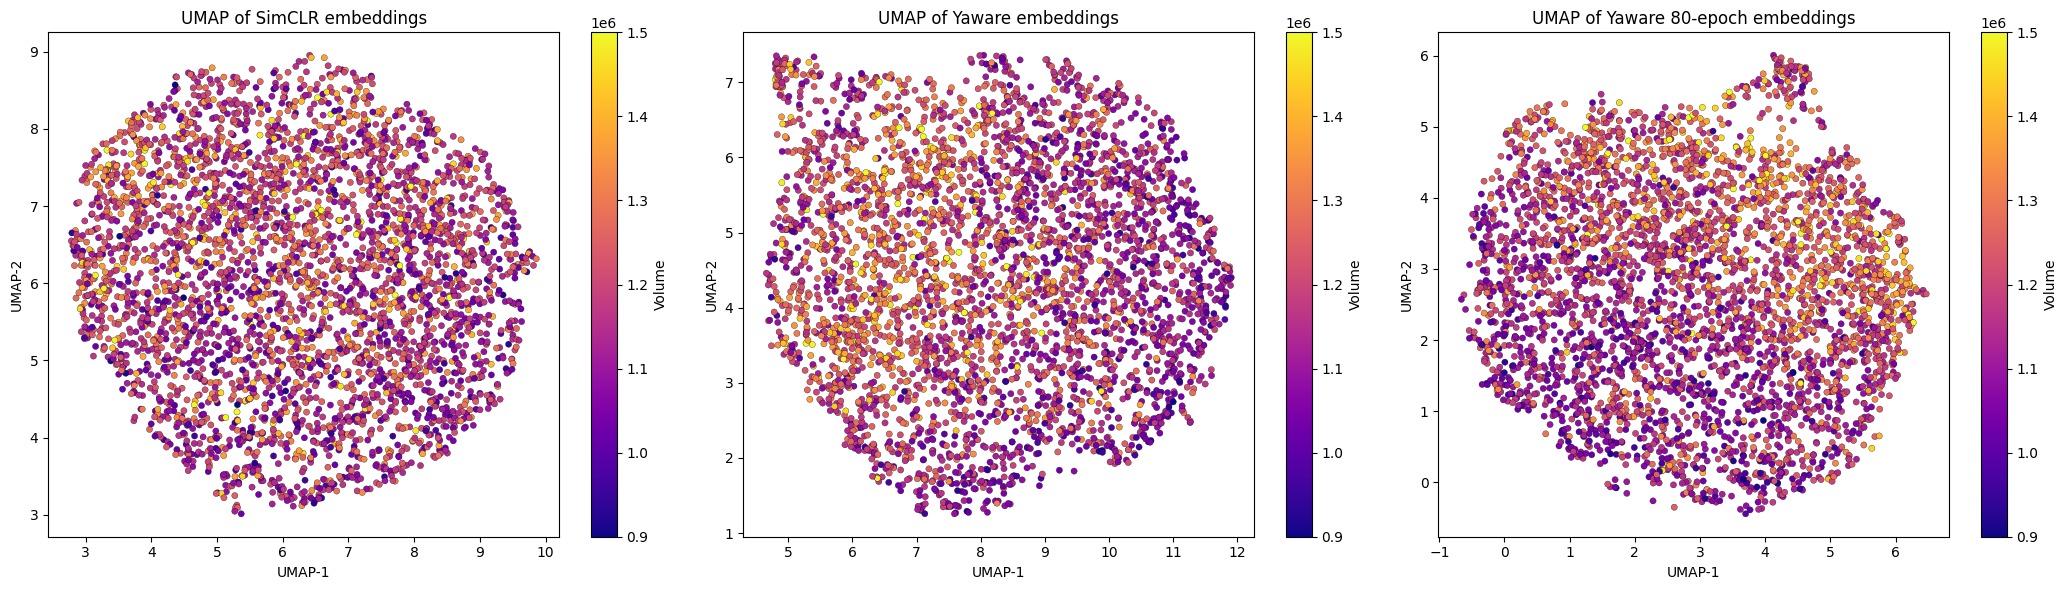

In [29]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# File paths
file_256d = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/FIP_right/dim_256_batch_size_128_sigma_0.05/ukb40_volume_random_embeddings/test_embeddings.csv"
file_32d = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/FIP_right_UKB40/batch_size_128/ukb40_volume_random_embeddings/test_embeddings.csv"
file_80epoch = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/80_epoch_FIP_right/batch_128_sigma_0.05/ukb40_volume_random_embeddings/test_embeddings.csv"
volumes_file = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_sex_age_volumes.csv"

# Load data
df_256d = pd.read_csv(file_256d)
df_32d = pd.read_csv(file_32d)
df_80epoch = pd.read_csv(file_80epoch)
df_volumes = pd.read_csv(volumes_file)

# Rename ID columns for consistency
df_256d.rename(columns={df_256d.columns[0]: "ID"}, inplace=True)
df_32d.rename(columns={df_32d.columns[0]: "ID"}, inplace=True)
df_80epoch.rename(columns={df_80epoch.columns[0]: "ID"}, inplace=True)
df_volumes.rename(columns={"participant_id": "ID"}, inplace=True)

# Keep only volume column
df_volumes = df_volumes[["ID", "volume"]]

# Merge volume info
df_256d = df_256d.merge(df_volumes, on="ID", how="inner")
df_32d = df_32d.merge(df_volumes, on="ID", how="inner")
df_80epoch = df_80epoch.merge(df_volumes, on="ID", how="inner")

# Apply UMAP
umap_256d = umap.UMAP(n_components=2, random_state=42)
umap_32d = umap.UMAP(n_components=2, random_state=42)
umap_80epoch = umap.UMAP(n_components=2, random_state=42)

embedding_256d = umap_256d.fit_transform(df_256d.drop(columns=["ID", "volume"]))
embedding_32d = umap_32d.fit_transform(df_32d.drop(columns=["ID", "volume"]))
embedding_80epoch = umap_80epoch.fit_transform(df_80epoch.drop(columns=["ID", "volume"]))

# Define vmin/vmax for better contrast
vmin = 900_000
vmax = 1_500_000

# Plot all 3
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

sc1 = axes[0].scatter(
    embedding_32d[:, 0], embedding_32d[:, 1],
    c=df_32d["volume"], cmap="plasma", s=20, edgecolor="k", linewidth=0.2,
    vmin=vmin, vmax=vmax
)
axes[0].set_title("UMAP of SimCLR embeddings")
axes[0].set_xlabel("UMAP-1")
axes[0].set_ylabel("UMAP-2")
plt.colorbar(sc1, ax=axes[0], label="Volume")

sc2 = axes[1].scatter(
    embedding_256d[:, 0], embedding_256d[:, 1],
    c=df_256d["volume"], cmap="plasma", s=20, edgecolor="k", linewidth=0.2,
    vmin=vmin, vmax=vmax
)
axes[1].set_title("UMAP of Yaware embeddings")
axes[1].set_xlabel("UMAP-1")
axes[1].set_ylabel("UMAP-2")
plt.colorbar(sc1, ax=axes[1], label="Volume")


sc3 = axes[2].scatter(
    embedding_80epoch[:, 0], embedding_80epoch[:, 1],
    c=df_80epoch["volume"], cmap="plasma", s=20, edgecolor="k", linewidth=0.2,
    vmin=vmin, vmax=vmax
)
axes[2].set_title("UMAP of Yaware 80-epoch embeddings")
axes[2].set_xlabel("UMAP-1")
axes[2].set_ylabel("UMAP-2")
plt.colorbar(sc3, ax=axes[2], label="Volume")

plt.tight_layout()
plt.savefig("/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/abdelghani_figures/umap_embedding_comparison.png")
plt.show()


/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/umap/umap_.p

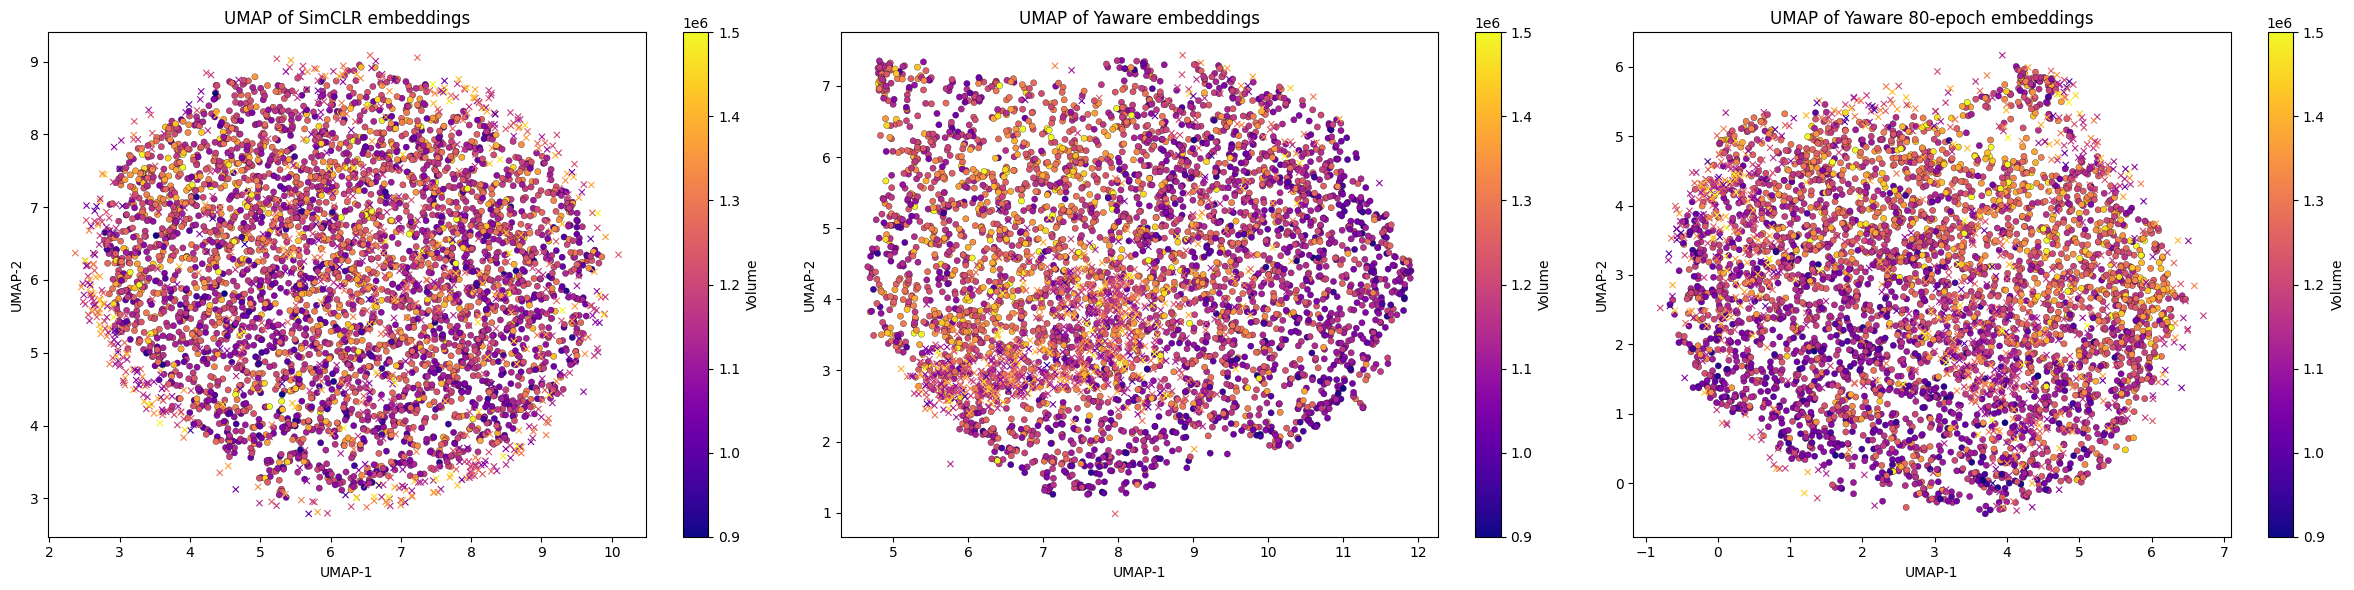

In [45]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# --- File paths ---
file_256d = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/FIP_right/dim_256_batch_size_128_sigma_0.05/ukb40_volume_random_embeddings/test_embeddings.csv"
file_32d = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/FIP_right_UKB40/batch_size_128/ukb40_volume_random_embeddings/test_embeddings.csv"
file_80epoch = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/80_epoch_FIP_right/batch_128_sigma_0.05/ukb40_volume_random_embeddings/test_embeddings.csv"
file_hcp = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/SC_right/batch_size128_sigma_0.01/ukb40_random_embeddings/full_embeddings.csv"

# Volume files
volumes_ukbb = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_sex_age_volumes.csv"
volumes_hcp = "/neurospin/dico/data/deep_folding/current/datasets/hcp/hcp_subjects_gender_age_volume.csv"

# --- Load data ---
df_256d = pd.read_csv(file_256d)
df_32d = pd.read_csv(file_32d)
df_80epoch = pd.read_csv(file_80epoch)
df_hcp = pd.read_csv(file_hcp)

df_vol_ukbb = pd.read_csv(volumes_ukbb)
df_vol_hcp = pd.read_csv(volumes_hcp)

# --- Normalize IDs ---
for df in [df_256d, df_32d, df_80epoch, df_hcp]:
    df.rename(columns={df.columns[0]: "ID"}, inplace=True)
    df["ID"] = df["ID"].astype(str).str.replace("sub-", "", regex=False).str.strip().str.zfill(6)

df_vol_ukbb.rename(columns={"participant_id": "ID"}, inplace=True)
df_vol_ukbb["ID"] = df_vol_ukbb["ID"].astype(str).str.replace("sub-", "", regex=False).str.strip().str.zfill(6)
df_vol_ukbb = df_vol_ukbb[["ID", "volume"]]

df_vol_hcp["ID"] = df_vol_hcp["Subject"].astype(str).str.strip().str.zfill(6)
df_vol_hcp = df_vol_hcp[["ID", "volume"]]

# --- Merge ---
df_256d = df_256d.merge(df_vol_ukbb, on="ID", how="inner")
df_32d = df_32d.merge(df_vol_ukbb, on="ID", how="inner")
df_80epoch = df_80epoch.merge(df_vol_ukbb, on="ID", how="inner")
df_hcp = df_hcp.merge(df_vol_hcp, on="ID", how="inner")

# --- Setup UMAP ---
vmin = 900_000
vmax = 1_500_000
reducer_256d = umap.UMAP(n_components=2, random_state=42)
reducer_32d = umap.UMAP(n_components=2, random_state=42)
reducer_80epoch = umap.UMAP(n_components=2, random_state=42)

X_256d = df_256d.drop(columns=["ID", "volume"])
X_32d = df_32d.drop(columns=["ID", "volume"])
X_80epoch = df_80epoch.drop(columns=["ID", "volume"])
X_hcp = df_hcp.drop(columns=["ID", "volume"])

# --- Fit on UKBB ---
emb_256d = reducer_256d.fit_transform(X_256d)
emb_32d = reducer_32d.fit_transform(X_32d)
emb_80epoch = reducer_80epoch.fit_transform(X_80epoch)

# --- Transform HCP embeddings to UKBB UMAP spaces ---
emb_hcp_on_256d = reducer_256d.transform(X_hcp)
emb_hcp_on_32d = reducer_32d.transform(X_hcp)
emb_hcp_on_80epoch = reducer_80epoch.transform(X_hcp)

# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# 32D SimCLR
sc = axes[0].scatter(emb_32d[:, 0], emb_32d[:, 1], c=df_32d["volume"], cmap="plasma", s=20, edgecolor="k", linewidth=0.2, vmin=vmin, vmax=vmax)
axes[0].scatter(emb_hcp_on_32d[:, 0], emb_hcp_on_32d[:, 1], c=df_hcp["volume"], cmap="plasma", marker='x', s=20, linewidth=0.8, vmin=vmin, vmax=vmax)
axes[0].set_title("UMAP of SimCLR embeddings")
axes[0].set_xlabel("UMAP-1")
axes[0].set_ylabel("UMAP-2")
plt.colorbar(sc, ax=axes[0], label="Volume")

# 256D Yaware
sc = axes[1].scatter(emb_256d[:, 0], emb_256d[:, 1], c=df_256d["volume"], cmap="plasma", s=20, edgecolor="k", linewidth=0.2, vmin=vmin, vmax=vmax)
axes[1].scatter(emb_hcp_on_256d[:, 0], emb_hcp_on_256d[:, 1], c=df_hcp["volume"], cmap="plasma", marker='x', s=20, linewidth=0.8, vmin=vmin, vmax=vmax)
axes[1].set_title("UMAP of Yaware embeddings")
axes[1].set_xlabel("UMAP-1")
axes[1].set_ylabel("UMAP-2")
plt.colorbar(sc, ax=axes[1], label="Volume")

# 80-epoch Yaware
sc = axes[2].scatter(emb_80epoch[:, 0], emb_80epoch[:, 1], c=df_80epoch["volume"], cmap="plasma", s=20, edgecolor="k", linewidth=0.2, vmin=vmin, vmax=vmax)
axes[2].scatter(emb_hcp_on_80epoch[:, 0], emb_hcp_on_80epoch[:, 1], c=df_hcp["volume"], cmap="plasma", marker='x', s=20, linewidth=0.8, vmin=vmin, vmax=vmax)
axes[2].set_title("UMAP of Yaware 80-epoch embeddings")
axes[2].set_xlabel("UMAP-1")
axes[2].set_ylabel("UMAP-2")
plt.colorbar(sc, ax=axes[2], label="Volume")

plt.tight_layout()
plt.savefig("/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/abdelghani_figures_volumed.png")
plt.show()


/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/umap/umap_.p

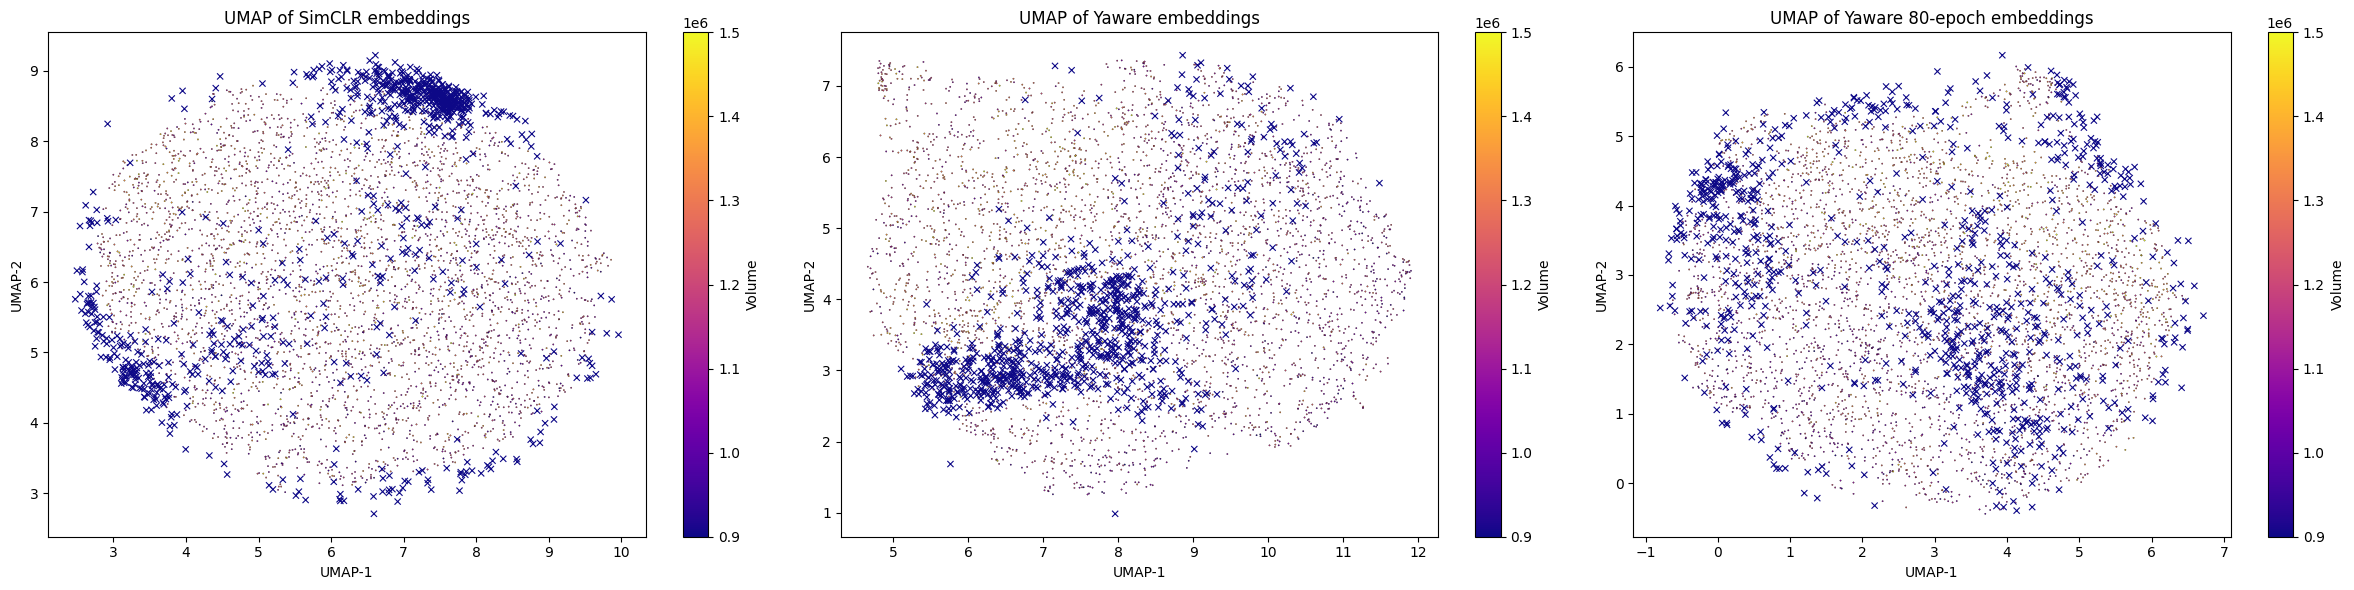

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# --- File paths ---
file_256d = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/FIP_right/dim_256_batch_size_128_sigma_0.05/ukb40_volume_random_embeddings/test_embeddings.csv"
file_32d = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/FIP_right_UKB40/batch_size_128/ukb40_volume_random_embeddings/test_embeddings.csv"
file_80epoch = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/80_epoch_FIP_right/batch_128_sigma_0.05/ukb40_volume_random_embeddings/test_embeddings.csv"
file_hcp = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/SC_right/batch_size128_sigma_0.01/ukb40_random_embeddings/full_embeddings.csv"

# Volume files
volumes_ukbb = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_sex_age_volumes.csv"
volumes_hcp = "/neurospin/dico/data/deep_folding/current/datasets/hcp/hcp_subjects_gender_age_volume.csv"

# --- Load data ---
df_256d = pd.read_csv(file_256d)
df_32d = pd.read_csv(file_32d)
df_80epoch = pd.read_csv(file_80epoch)
df_hcp = pd.read_csv(file_hcp)

df_vol_ukbb = pd.read_csv(volumes_ukbb)
df_vol_hcp = pd.read_csv(volumes_hcp)

# --- Normalize IDs ---
for df in [df_256d, df_32d, df_80epoch, df_hcp]:
    df.rename(columns={df.columns[0]: "ID"}, inplace=True)
    df["ID"] = df["ID"].astype(str).str.replace("sub-", "", regex=False).str.strip().str.zfill(6)

df_vol_ukbb.rename(columns={"participant_id": "ID"}, inplace=True)
df_vol_ukbb["ID"] = df_vol_ukbb["ID"].astype(str).str.replace("sub-", "", regex=False).str.strip().str.zfill(6)
df_vol_ukbb = df_vol_ukbb[["ID", "volume"]]

df_vol_hcp["ID"] = df_vol_hcp["Subject"].astype(str).str.strip().str.zfill(6)
df_vol_hcp = df_vol_hcp[["ID", "volume"]]

# --- Merge ---
df_256d = df_256d.merge(df_vol_ukbb, on="ID", how="inner")
df_32d = df_32d.merge(df_vol_ukbb, on="ID", how="inner")
df_80epoch = df_80epoch.merge(df_vol_ukbb, on="ID", how="inner")
df_hcp = df_hcp.merge(df_vol_hcp, on="ID", how="inner")

# --- Setup UMAP ---
vmin = 900_000
vmax = 1_500_000
reducer_256d = umap.UMAP(n_components=2, random_state=42)
reducer_32d = umap.UMAP(n_components=2, random_state=42)
reducer_80epoch = umap.UMAP(n_components=2, random_state=42)

X_256d = df_256d.drop(columns=["ID", "volume"])
X_32d = df_32d.drop(columns=["ID", "volume"])
X_80epoch = df_80epoch.drop(columns=["ID", "volume"])
X_hcp = df_hcp.drop(columns=["ID", "volume"])

# --- Fit on UKBB ---
emb_256d = reducer_256d.fit_transform(X_256d)
emb_32d = reducer_32d.fit_transform(X_32d)
emb_80epoch = reducer_80epoch.fit_transform(X_80epoch)

# --- Transform HCP embeddings to UKBB UMAP spaces ---
emb_hcp_on_256d = reducer_256d.transform(X_hcp)
emb_hcp_on_32d = reducer_32d.transform(X_hcp)
emb_hcp_on_80epoch = reducer_80epoch.transform(X_hcp)

# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# 32D SimCLR
sc = axes[0].scatter(emb_32d[:, 0], emb_32d[:, 1], c=df_32d["volume"], cmap="plasma", s=1, edgecolor="k", linewidth=0.2, vmin=vmin, vmax=vmax)
axes[0].scatter(emb_hcp_on_32d[:, 0], emb_hcp_on_32d[:, 1], c=df_hcp["volume"], cmap="plasma", marker='x', s=20, linewidth=0.8, vmin=vmin, vmax=vmax)
axes[0].set_title("UMAP of SimCLR embeddings")
axes[0].set_xlabel("UMAP-1")
axes[0].set_ylabel("UMAP-2")
plt.colorbar(sc, ax=axes[0], label="Volume")

# 256D Yaware
sc = axes[1].scatter(emb_256d[:, 0], emb_256d[:, 1], c=df_256d["volume"], cmap="plasma", s=1, edgecolor="k", linewidth=0.2, vmin=vmin, vmax=vmax)
axes[1].scatter(emb_hcp_on_256d[:, 0], emb_hcp_on_256d[:, 1], c=df_hcp["volume"], cmap="plasma", marker='x', s=20, linewidth=0.8, vmin=vmin, vmax=vmax)
axes[1].set_title("UMAP of Yaware embeddings")
axes[1].set_xlabel("UMAP-1")
axes[1].set_ylabel("UMAP-2")
plt.colorbar(sc, ax=axes[1], label="Volume")

# 80-epoch Yaware
sc = axes[2].scatter(emb_80epoch[:, 0], emb_80epoch[:, 1], c=df_80epoch["volume"], cmap="plasma", s=1, edgecolor="k", linewidth=0.2, vmin=vmin, vmax=vmax)
axes[2].scatter(emb_hcp_on_80epoch[:, 0], emb_hcp_on_80epoch[:, 1], c=df_hcp["volume"], cmap="plasma", marker='x', s=20, linewidth=0.8, vmin=vmin, vmax=vmax)
axes[2].set_title("UMAP of Yaware 80-epoch embeddings")
axes[2].set_xlabel("UMAP-1")
axes[2].set_ylabel("UMAP-2")
plt.colorbar(sc, ax=axes[2], label="Volume")

plt.tight_layout()
plt.savefig("/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/abdelghani_figures/umap_embedding_comparison_hcp_presence.png")
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
import os
import csv

# File paths
right_file = "/neurospin/dico/data/deep_folding/current/datasets/hcp/hcp_isomap_labels_SC-sylv_right.csv"
metadata_file = "/neurospin/dico/data/deep_folding/current/datasets/hcp/hcp_subjects_gender_age_volume_normalized.csv"
output_dir = "/neurospin/dico/data/deep_folding/current/datasets/hcp/Isomap/splits_right"

os.makedirs(output_dir, exist_ok=True)

# Load subject list and metadata
df_right = pd.read_csv(right_file, usecols=[0])
df_right.columns = ['Subject']
df_meta = pd.read_csv(metadata_file)

# Merge to keep only subjects with metadata
df = df_right.merge(df_meta, on='Subject', how='inner')

# Use existing age group categories (like '26-30') for stratification
df['StratifyKey'] = df['Gender'].astype(str) + "_" + df['Age'].astype(str)

# Split into train_val (90%) and test (10%)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
train_val_idx, test_idx = next(sss.split(df, df['StratifyKey']))
df_train_val = df.iloc[train_val_idx].reset_index(drop=True)
df_test = df.iloc[test_idx].reset_index(drop=True)

# Further split train_val into train (80%) and val (10%) from the total
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.1111, random_state=42)  # ≈ 10% of total
train_idx, val_idx = next(sss2.split(df_train_val, df_train_val['StratifyKey']))
df_train = df_train_val.iloc[train_idx].reset_index(drop=True)
df_val = df_train_val.iloc[val_idx].reset_index(drop=True)

# Save main splits with quoted IDs
df_train[['Subject']].to_csv(os.path.join(output_dir, "train_split.csv"), index=False, header=False, quoting=csv.QUOTE_ALL)
df_val[['Subject']].to_csv(os.path.join(output_dir, "val_split.csv"), index=False, header=False, quoting=csv.QUOTE_ALL)
df_test[['Subject']].to_csv(os.path.join(output_dir, "test_split.csv"), index=False, header=False, quoting=csv.QUOTE_ALL)

# Save union and train_val
df_union = pd.concat([df_train, df_val]).reset_index(drop=True)
df_union[['Subject']].to_csv(os.path.join(output_dir, "union"), index=False, header=False, quoting=csv.QUOTE_ALL)
df_train_val[['Subject']].to_csv(os.path.join(output_dir, "train_val_split.csv"), index=False, header=False, quoting=csv.QUOTE_ALL)

# 5-fold CV splits from union — save each val fold only
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (_, val_idx) in enumerate(skf.split(df_union, df_union['StratifyKey'])):
    val_subjects = df_union.iloc[val_idx][['Subject']]
    val_subjects.to_csv(os.path.join(output_dir, f"train_val_split_{fold}.csv"), index=False, header=False, quoting=csv.QUOTE_ALL)

print(" All splits saved to:", output_dir)


 All splits saved to: /neurospin/dico/data/deep_folding/current/datasets/hcp/Isomap/splits_right


/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/contrastive/contrastive_env/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
